# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

#df = load_data('data/clinical_trial_raw.csv')
df = load_data('output/q6_cleaned_data.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [7]:
# TODO: Group by site
grouped_by_site = summarize_by_group(df, 'site', {'age': 'mean', 'bmi': 'mean', 'cholesterol_ldl': 'mean'})
print(grouped_by_site)

              age        bmi  cholesterol_ldl
site                                         
site a  81.208390  26.261570        85.830514
site b  80.453322  26.137668        85.296779
site c  80.756392  26.335215        85.801254
site d  80.759494  26.323917        84.728181
site e  80.427729  26.327237        86.582104


In [8]:
# TODO: Count by intervention group
grouped_by_intervention = summarize_by_group(df, 'intervention_group', {'patient_id': 'count'})
print(grouped_by_intervention)

                    patient_id
intervention_group            
control                   3337
treatment a               3321
treatment b               3342


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [9]:
# TODO: Use summarize_by_group utility
site_statistics = summarize_by_group(df, 'site')
print(site_statistics)

              age                         bmi                 systolic_bp  \
             mean        std count       mean       std count        mean   
site                                                                        
site a  81.208390  13.569270  2956  26.261570  3.737312  2956  117.341340   
site b  80.453322  13.313755  2453  26.137668  3.630759  2453  117.125561   
site c  80.756392  13.225545  2073  26.335215  3.703805  2073  117.937771   
site d  80.759494  13.357649  1501  26.323917  3.661309  1501  117.892738   
site e  80.427729  13.600708  1017  26.327237  3.629155  1017  117.481809   

                        diastolic_bp  ... follow_up_months adverse_events  \
              std count         mean  ...            count           mean   
site                                  ...                                   
site a  13.849256  2956    73.529432  ...             2956       0.141069   
site b  13.264675  2453    73.298002  ...             2453       0.149613  

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [10]:
# TODO: Multiple aggregations
aggregations = {
    'age': ['mean', 'std', 'min', 'max'],
    'bmi': ['mean', 'std'],
    'systolic_bp': ['mean', 'median']
}
site_multi_agg = summarize_by_group(df, 'site', aggregations)
print(site_multi_agg)

              age                                bmi           systolic_bp  \
             mean        std   min    max       mean       std        mean   
site                                                                         
site a  81.208390  13.569270  44.0  100.0  26.261570  3.737312  117.341340   
site b  80.453322  13.313755  45.0  100.0  26.137668  3.630759  117.125561   
site c  80.756392  13.225545  43.0  100.0  26.335215  3.703805  117.937771   
site d  80.759494  13.357649  45.0  100.0  26.323917  3.661309  117.892738   
site e  80.427729  13.600708  44.0  100.0  26.327237  3.629155  117.481809   

               
       median  
site           
site a  117.0  
site b  117.0  
site c  117.0  
site d  117.0  
site e  117.0  


## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [ ]:
# TODO: Intervention group comparisons
# clean up "outcome_cvd" column
df['outcome_cvd'] = (
    df['outcome_cvd'].astype(str)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .str.lower()
)

df['outcome_cvd_num'] = df['outcome_cvd'].map({'yes': 1, 'no': 0})
#print(df[['intervention_group', 'outcome_cvd', 'outcome_cvd_num']])

intervention_comparison = summarize_by_group(df, 'intervention_group', {
    'outcome_cvd_num': 'mean',
    'adherence_pct': 'mean'
})
print(intervention_comparison)




                    outcome_cvd_num  adherence_pct
intervention_group                                
control                    0.336530      60.830686
treatment a                0.319482      60.474255
treatment b                0.333633      61.149013


<Figure size 1000x600 with 0 Axes>

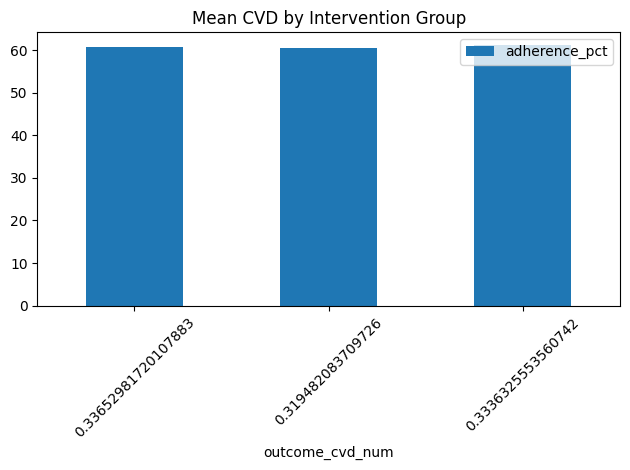

In [27]:
# TODO: Visualization
plot_group_comparison(intervention_comparison, 'outcome_cvd_num', 'adherence_pct', 'Mean CVD by Intervention Group')

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [ ]:
# TODO: Save summary outputs
site_statistics.to_csv('output/q7_site_statistics.csv', index=False)
intervention_comparison.to_csv('output/q7_intervention_comparison.csv', index=False)


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. Demographics across sites were highly consistent. Mean age was around 80–81 years and mean BMI about 26, with only minor variation between sites.
2. Blood pressure and cholesterol varibles were stable across sites, with average systolic BP near 117 mmHg and LDL cholesterol around 85 mg/dL.
3. Intervention outcomes showed small differences. Treatment group adherence was slightly higher in Treatment B (61.1%) compared with Control (60.8%) and Treatment A (60.5%), and the incidence of cardiovascular outcomes was marginally lower in Treatment A (32.0%) than in the other groups.